In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(8425, 23)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

#### The data set is about rainfall weather forecasting in which we have to find out the next day's rainfall, whether it will rain or not and we also have to predict how much rainfall will happen. 
#### There are 8425 rows and 23 columns in this data set. 
##### But there are many null values inside this data set which we have to treat first.

<AxesSubplot:>

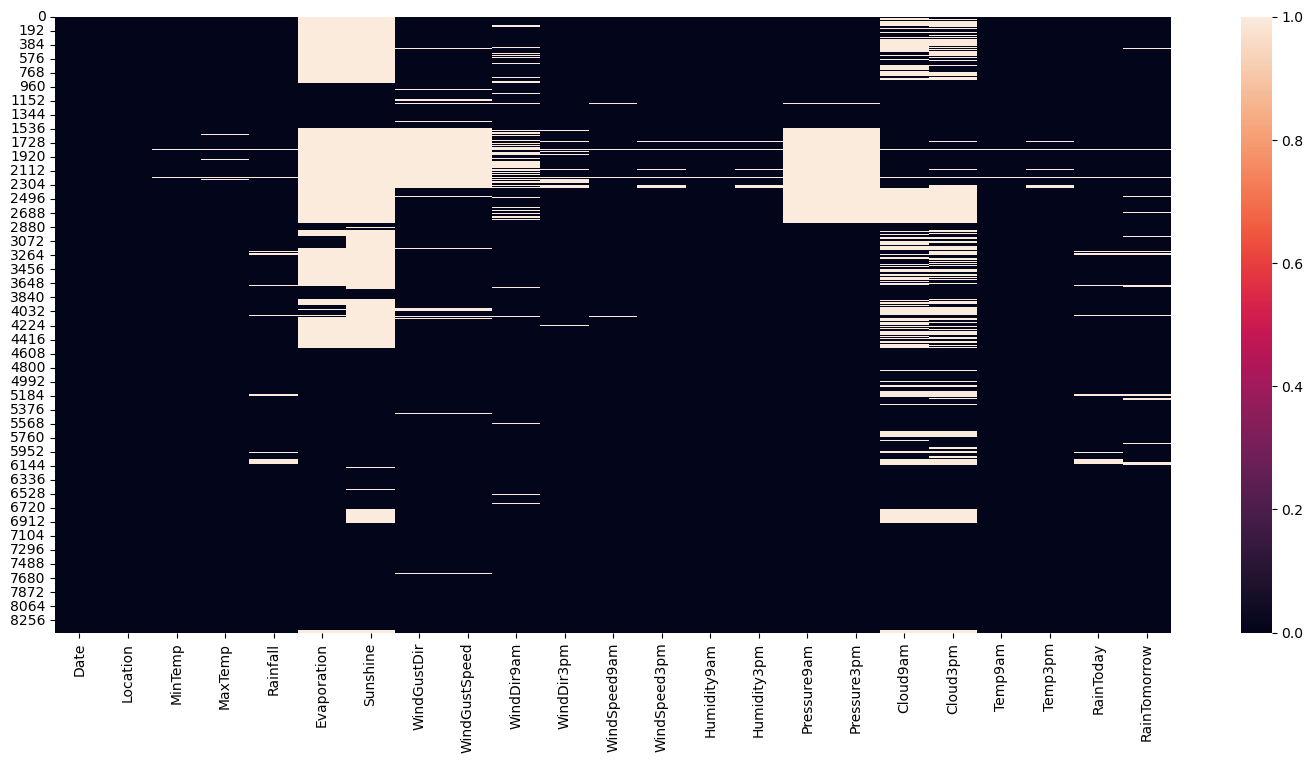

In [7]:
plt.figure(figsize=(18,8))
sns.heatmap(data.isnull())

In [8]:
## lot of nulls

In [9]:
null_col = data.isnull().sum()/data.shape[0]*100
null_col

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

####  Because many of our columns contain null values, we will remove those columns that have more than 20% null values.

In [10]:
drop_columns = null_col[null_col>20].keys()
drop_columns

Index(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], dtype='object')

In [11]:
data1 = data.drop(columns=drop_columns)

In [12]:
data1.shape

(8425, 19)

<AxesSubplot:>

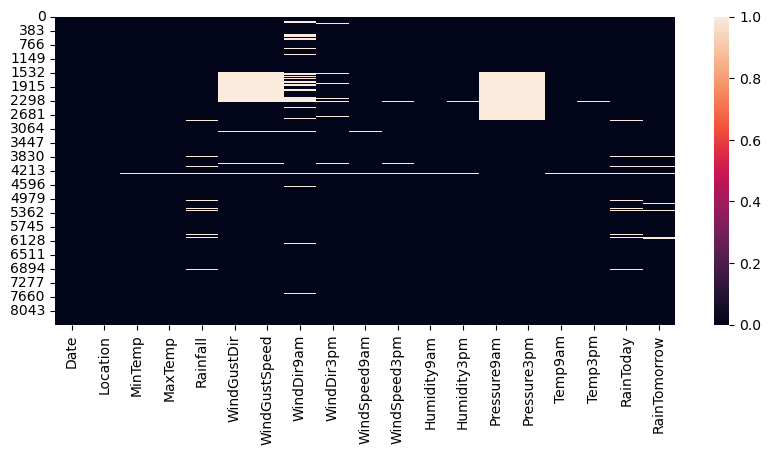

In [13]:
plt.figure(figsize=(10,4))
sns.heatmap(data1.isnull())

#### Will delete the remaining row of null values.

In [14]:
data2 = data1.dropna()

In [15]:
data2.shape

(6332, 19)

<AxesSubplot:>

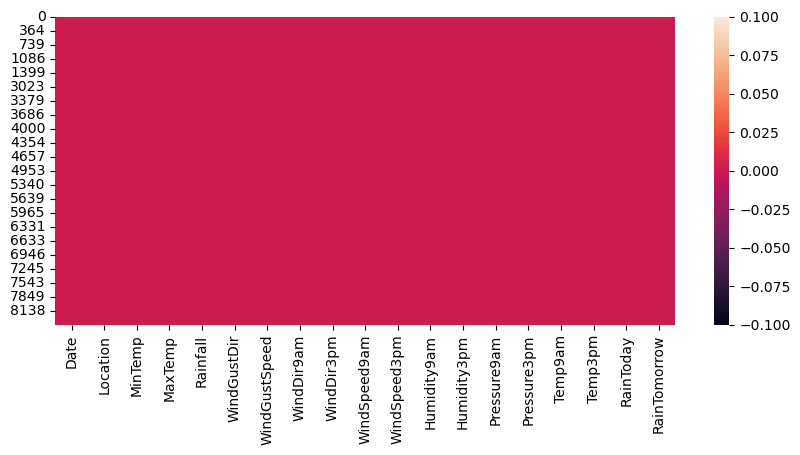

In [16]:
plt.figure(figsize=(10,4))
sns.heatmap(data2.isnull())

In [17]:
data2.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### now there is no null values

In [18]:
data2.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [19]:
for column in data2.columns:
    unique_count = data[column].nunique()
    print("Column:", column,'====', unique_count)

Column: Date ==== 3004
Column: Location ==== 12
Column: MinTemp ==== 285
Column: MaxTemp ==== 331
Column: Rainfall ==== 250
Column: WindGustDir ==== 16
Column: WindGustSpeed ==== 52
Column: WindDir9am ==== 16
Column: WindDir3pm ==== 16
Column: WindSpeed9am ==== 34
Column: WindSpeed3pm ==== 35
Column: Humidity9am ==== 90
Column: Humidity3pm ==== 94
Column: Pressure9am ==== 384
Column: Pressure3pm ==== 374
Column: Temp9am ==== 304
Column: Temp3pm ==== 328
Column: RainToday ==== 2
Column: RainTomorrow ==== 2


##### Let's convert date type object to datetime.

In [20]:
data2['Date'] = pd.to_datetime(data2['Date'])

In [21]:
data2.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [22]:
data2['day'] = data2['Date'].dt.day
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year


In [23]:
data2.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'day',
       'month', 'year'],
      dtype='object')

In [24]:
### Now we will remove date column because this is not useable now
data = data.drop(columns=['Date'])

In [25]:
#### now i will encode the object data type columns
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
encoder = OrdinalEncoder()

for column in enc_columns:
    data2[column] = encoder.fit_transform(data2[[column]])
    
print(data2.head())

        Date  Location  MinTemp  MaxTemp  Rainfall  WindGustDir  \
0 2008-12-01       1.0     13.4     22.9       0.6         13.0   
1 2008-12-02       1.0      7.4     25.1       0.0         14.0   
2 2008-12-03       1.0     12.9     25.7       0.0         15.0   
3 2008-12-04       1.0      9.2     28.0       0.0          4.0   
4 2008-12-05       1.0     17.5     32.3       1.0         13.0   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0        13.0        14.0          20.0          24.0   
1           44.0         6.0        15.0           4.0          22.0   
2           46.0        13.0        15.0          19.0          26.0   
3           24.0         9.0         0.0          11.0           9.0   
4           41.0         1.0         7.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0         71.0         22.0       1007.7       1007.1     16.9     21.8   
1         44.0

#### Let's examine correlation and multicollinearity.

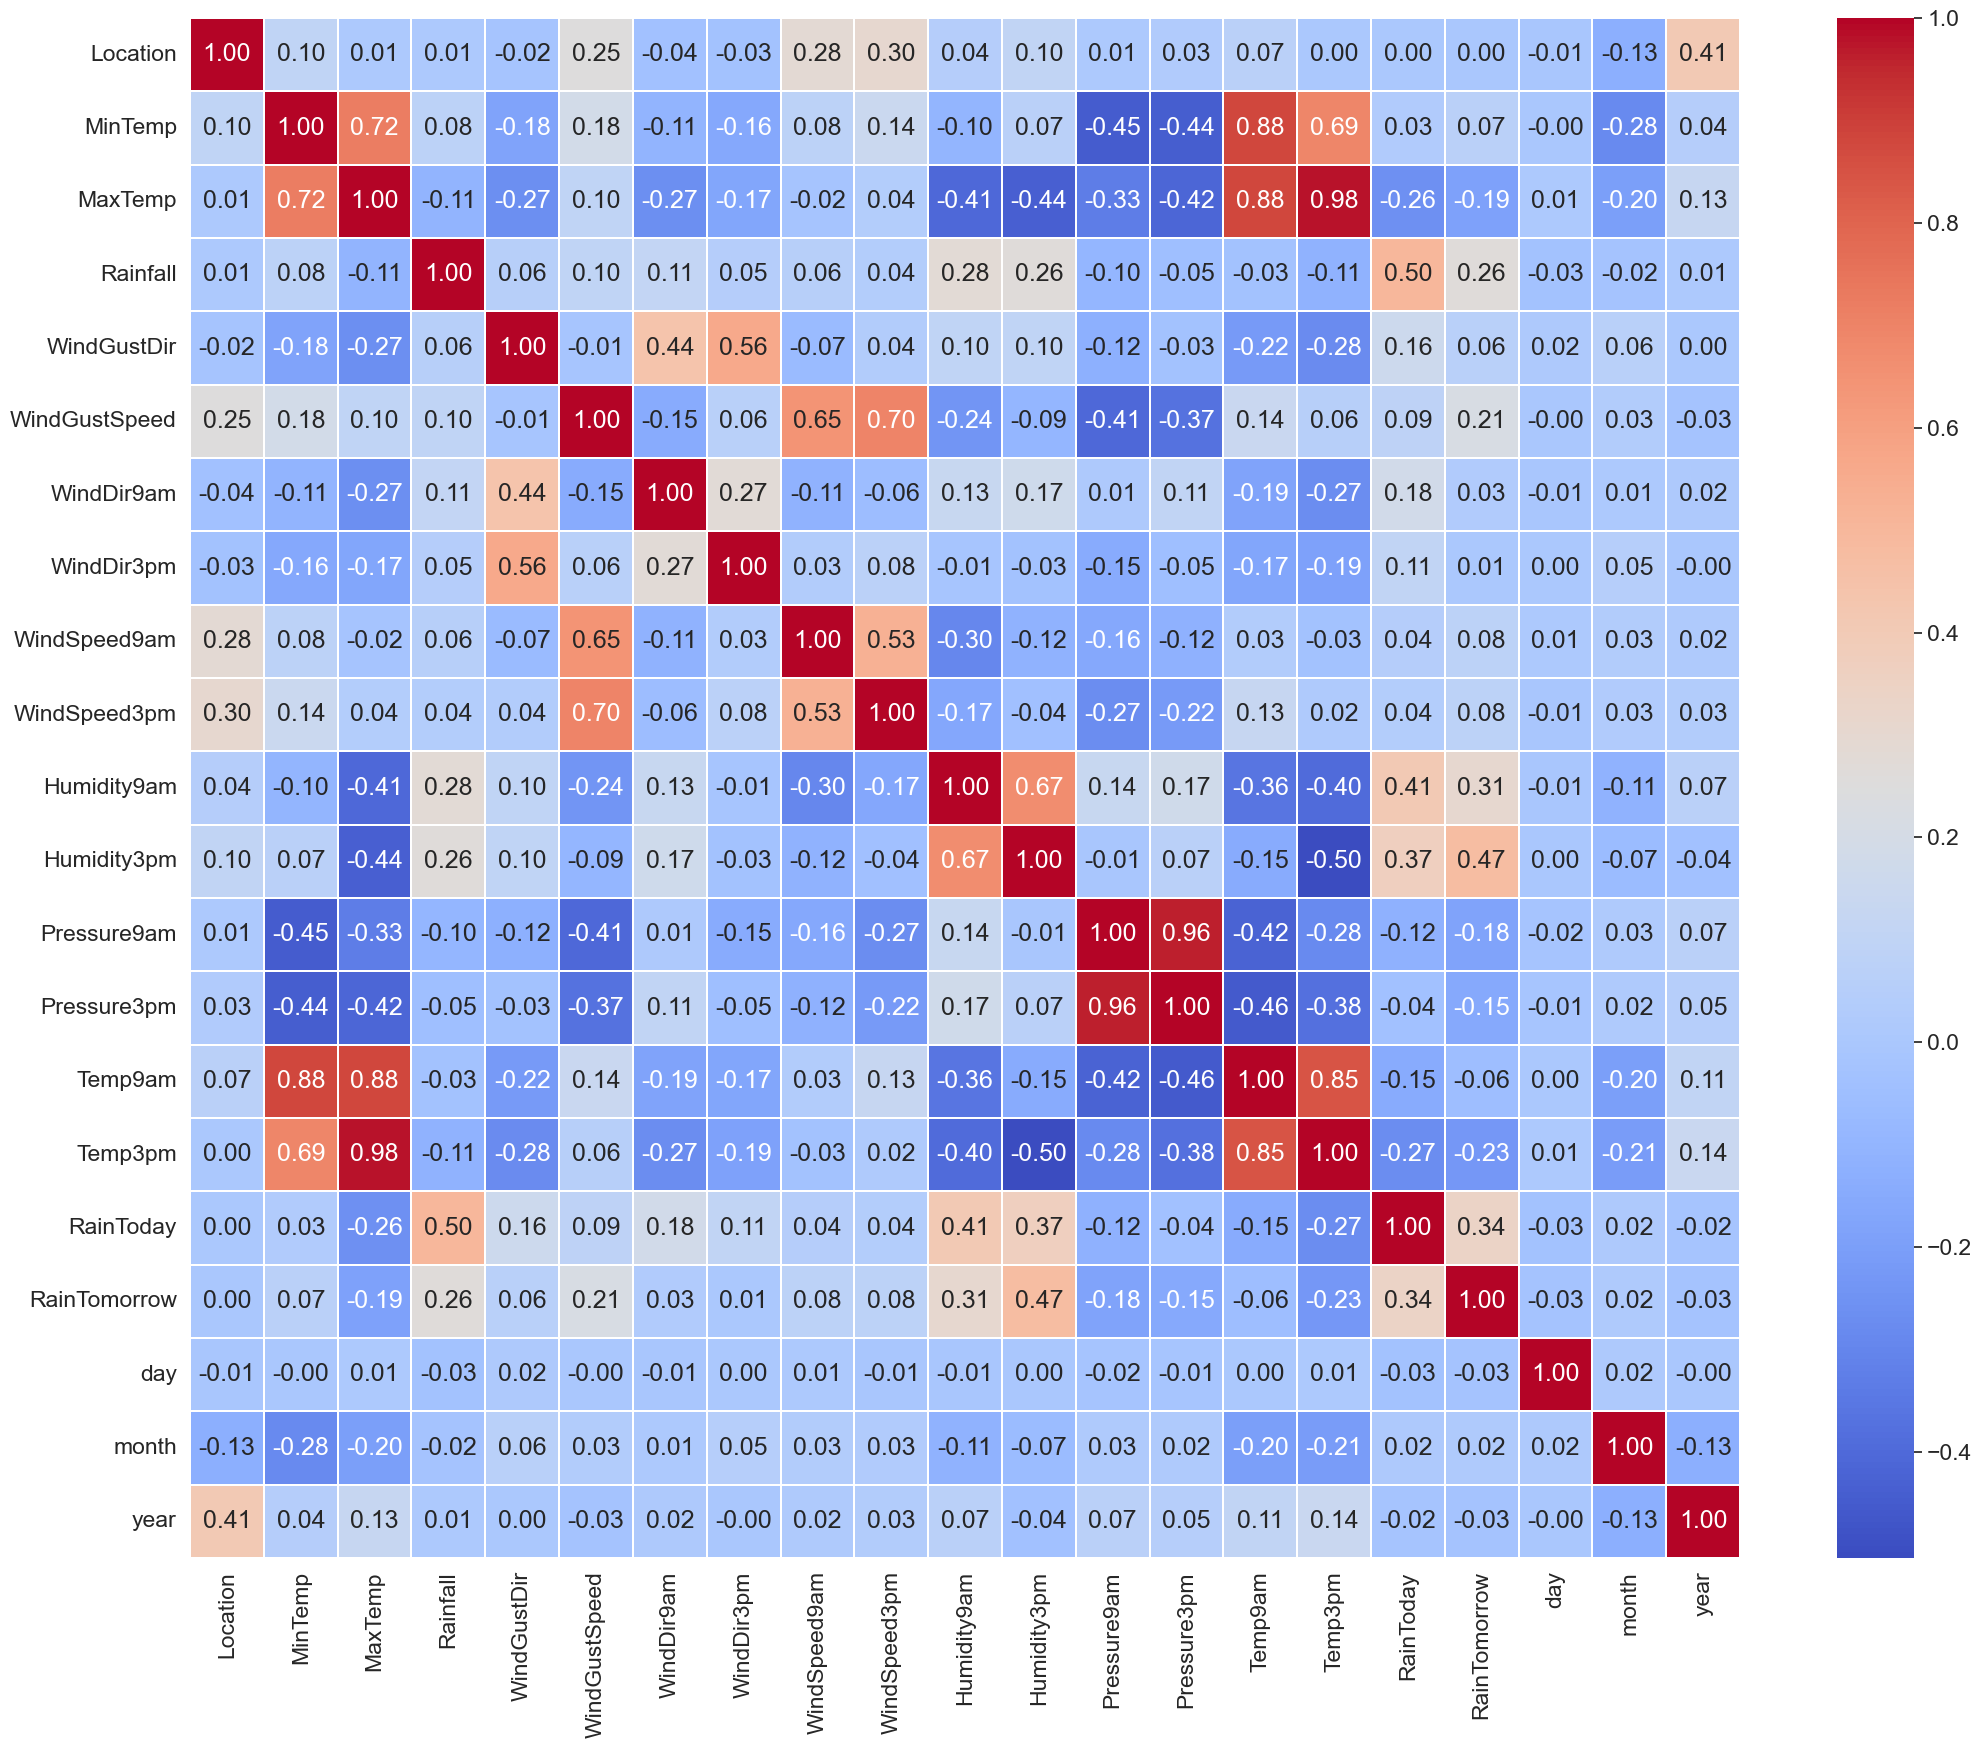

In [26]:
plt.figure(figsize = (25,20))
sns.set(font_scale = 1.5)
sns.heatmap(data2.corr(),linewidths=0.2,cmap='coolwarm', fmt=".2f", annot = True)
plt.show()

There is too much multicollinearity here. So I will delete those features due to which multicollinearity is increasing.
so i will remove those (Temp9am , Temp3pm , WindGustSpeed , MinTemp) columns. and Date also not useful our prediction

In [27]:
data2 = data2.drop(columns=['Temp9am','Temp3pm','WindGustSpeed','MinTemp','Date'])

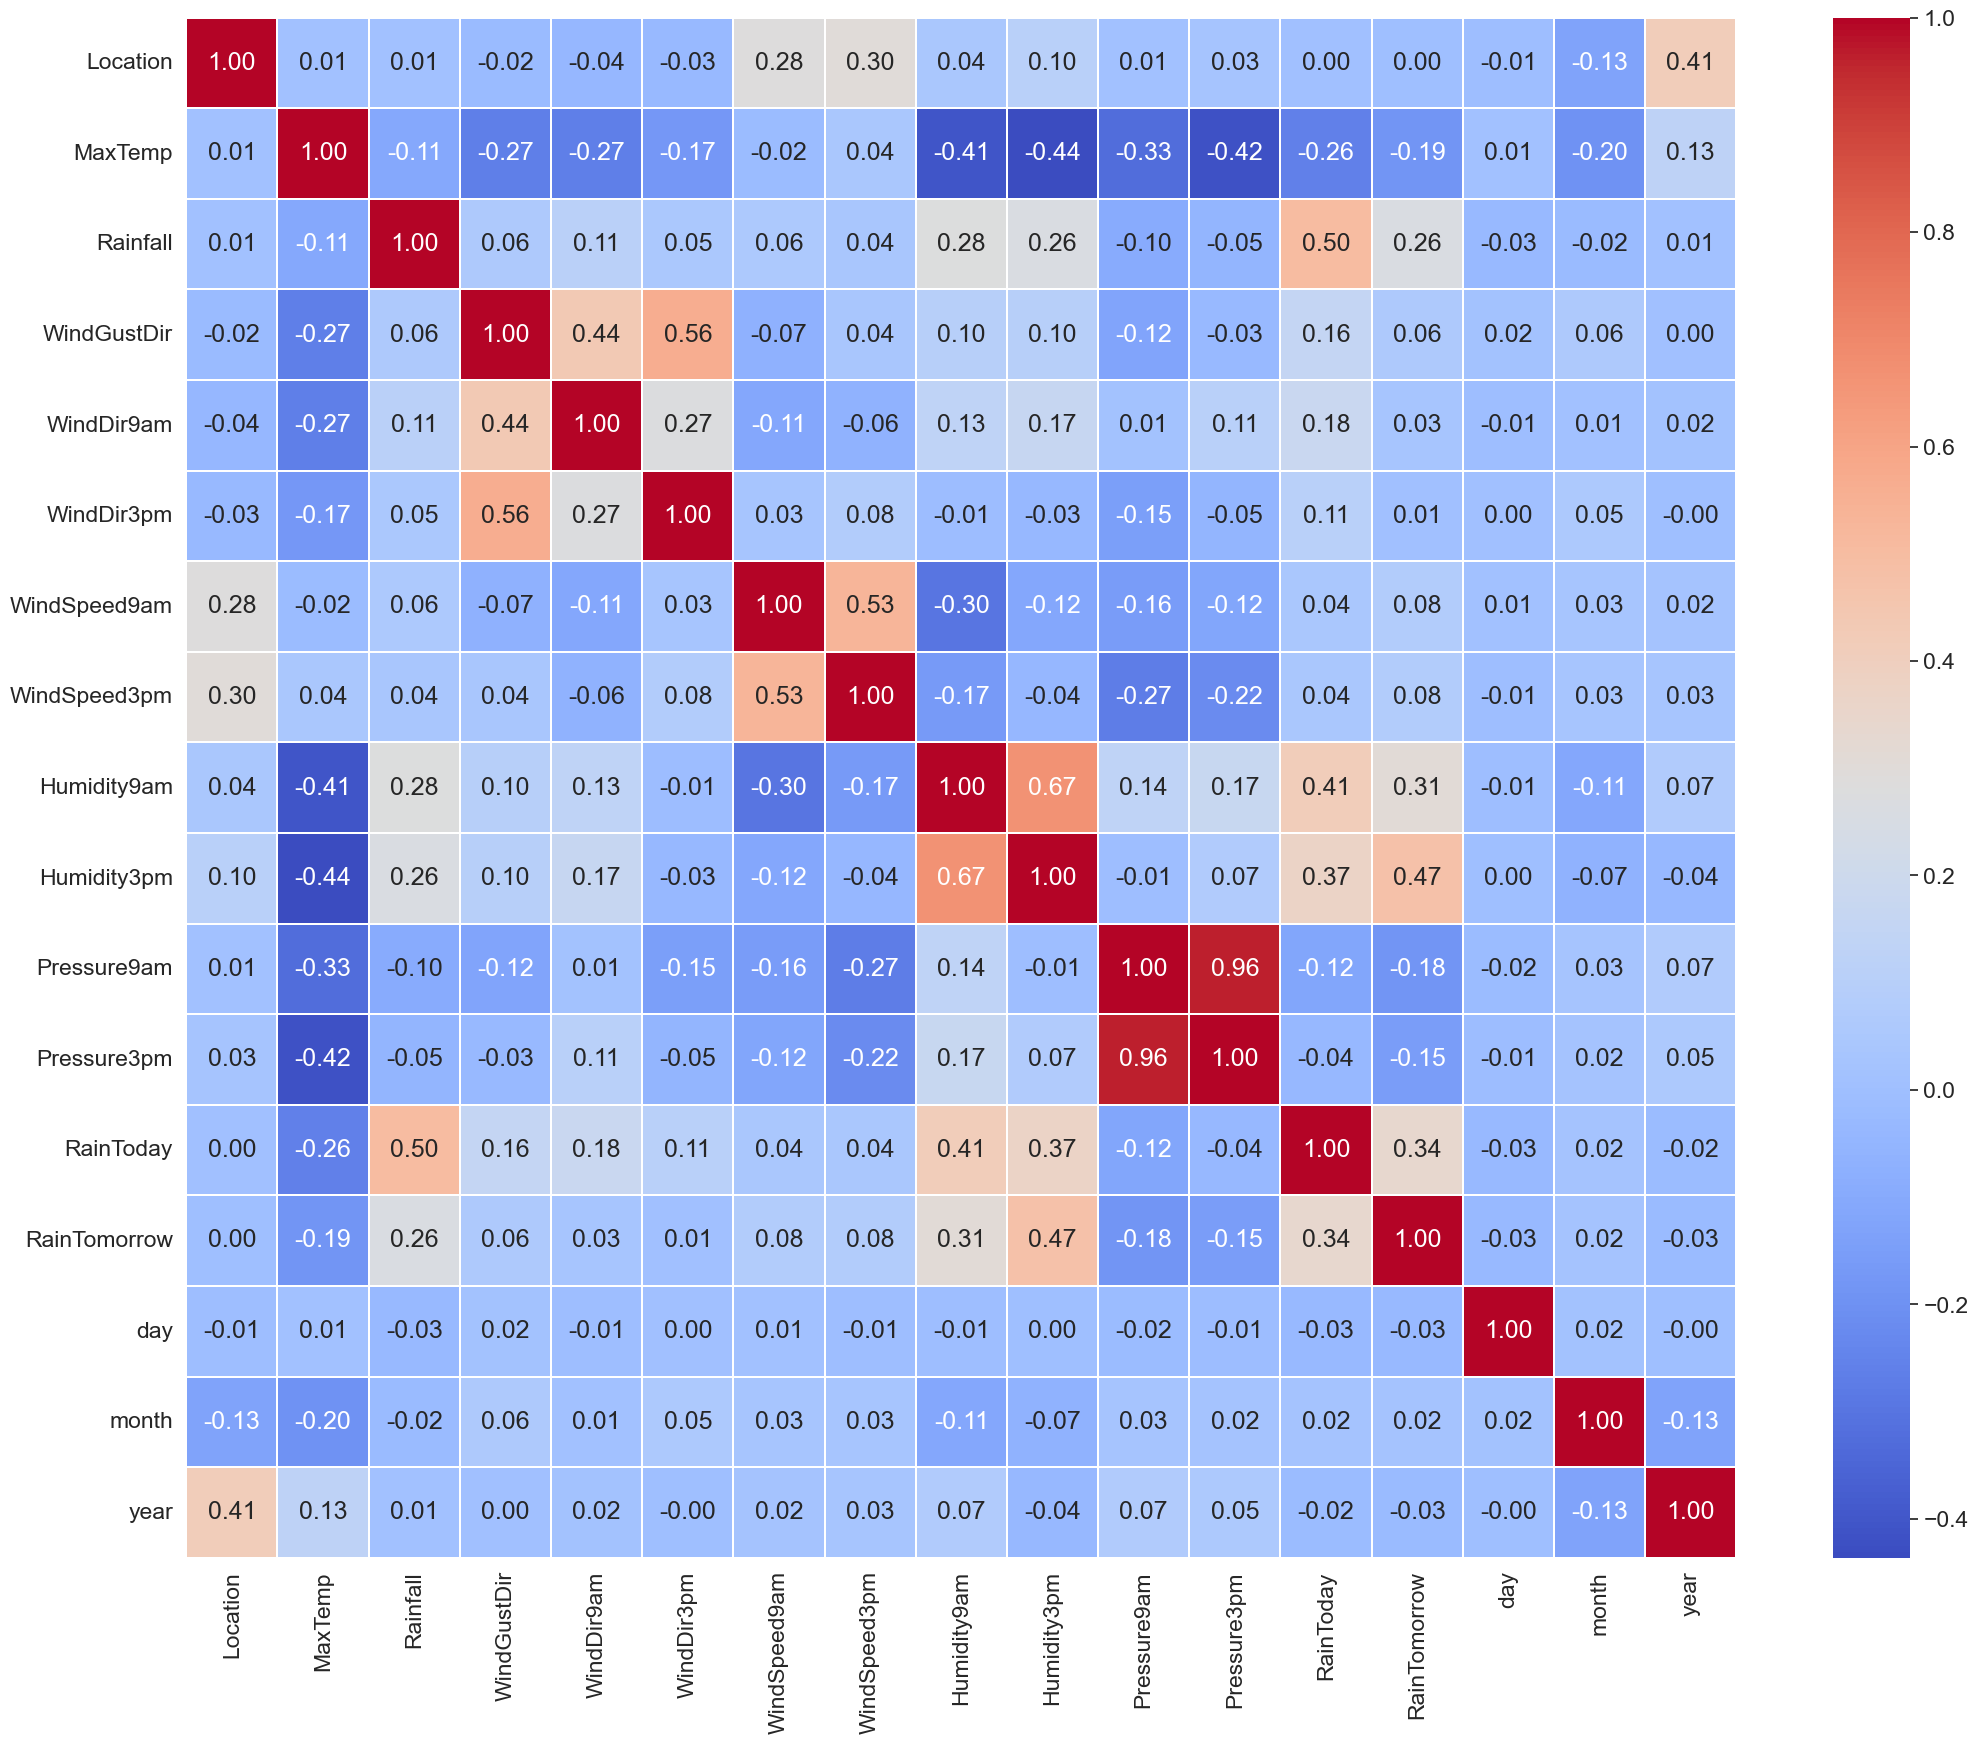

In [28]:
plt.figure(figsize = (25,20))
sns.set(font_scale = 1.5)
sns.heatmap(data2.corr(),linewidths=0.2,cmap='coolwarm', fmt=".2f", annot = True)
plt.show()

### For Rainfall

In [29]:
data_copy = data2.copy(deep = True)   

In [30]:
for column in data_copy.columns:
    unique_count = data_copy[column].nunique()
    print("Column:", column,'====', unique_count)

Column: Location ==== 10
Column: MaxTemp ==== 328
Column: Rainfall ==== 222
Column: WindGustDir ==== 16
Column: WindDir9am ==== 16
Column: WindDir3pm ==== 16
Column: WindSpeed9am ==== 32
Column: WindSpeed3pm ==== 31
Column: Humidity9am ==== 90
Column: Humidity3pm ==== 94
Column: Pressure9am ==== 374
Column: Pressure3pm ==== 369
Column: RainToday ==== 2
Column: RainTomorrow ==== 2
Column: day ==== 31
Column: month ==== 12
Column: year ==== 10


In [31]:
data_copy.shape

(6332, 17)

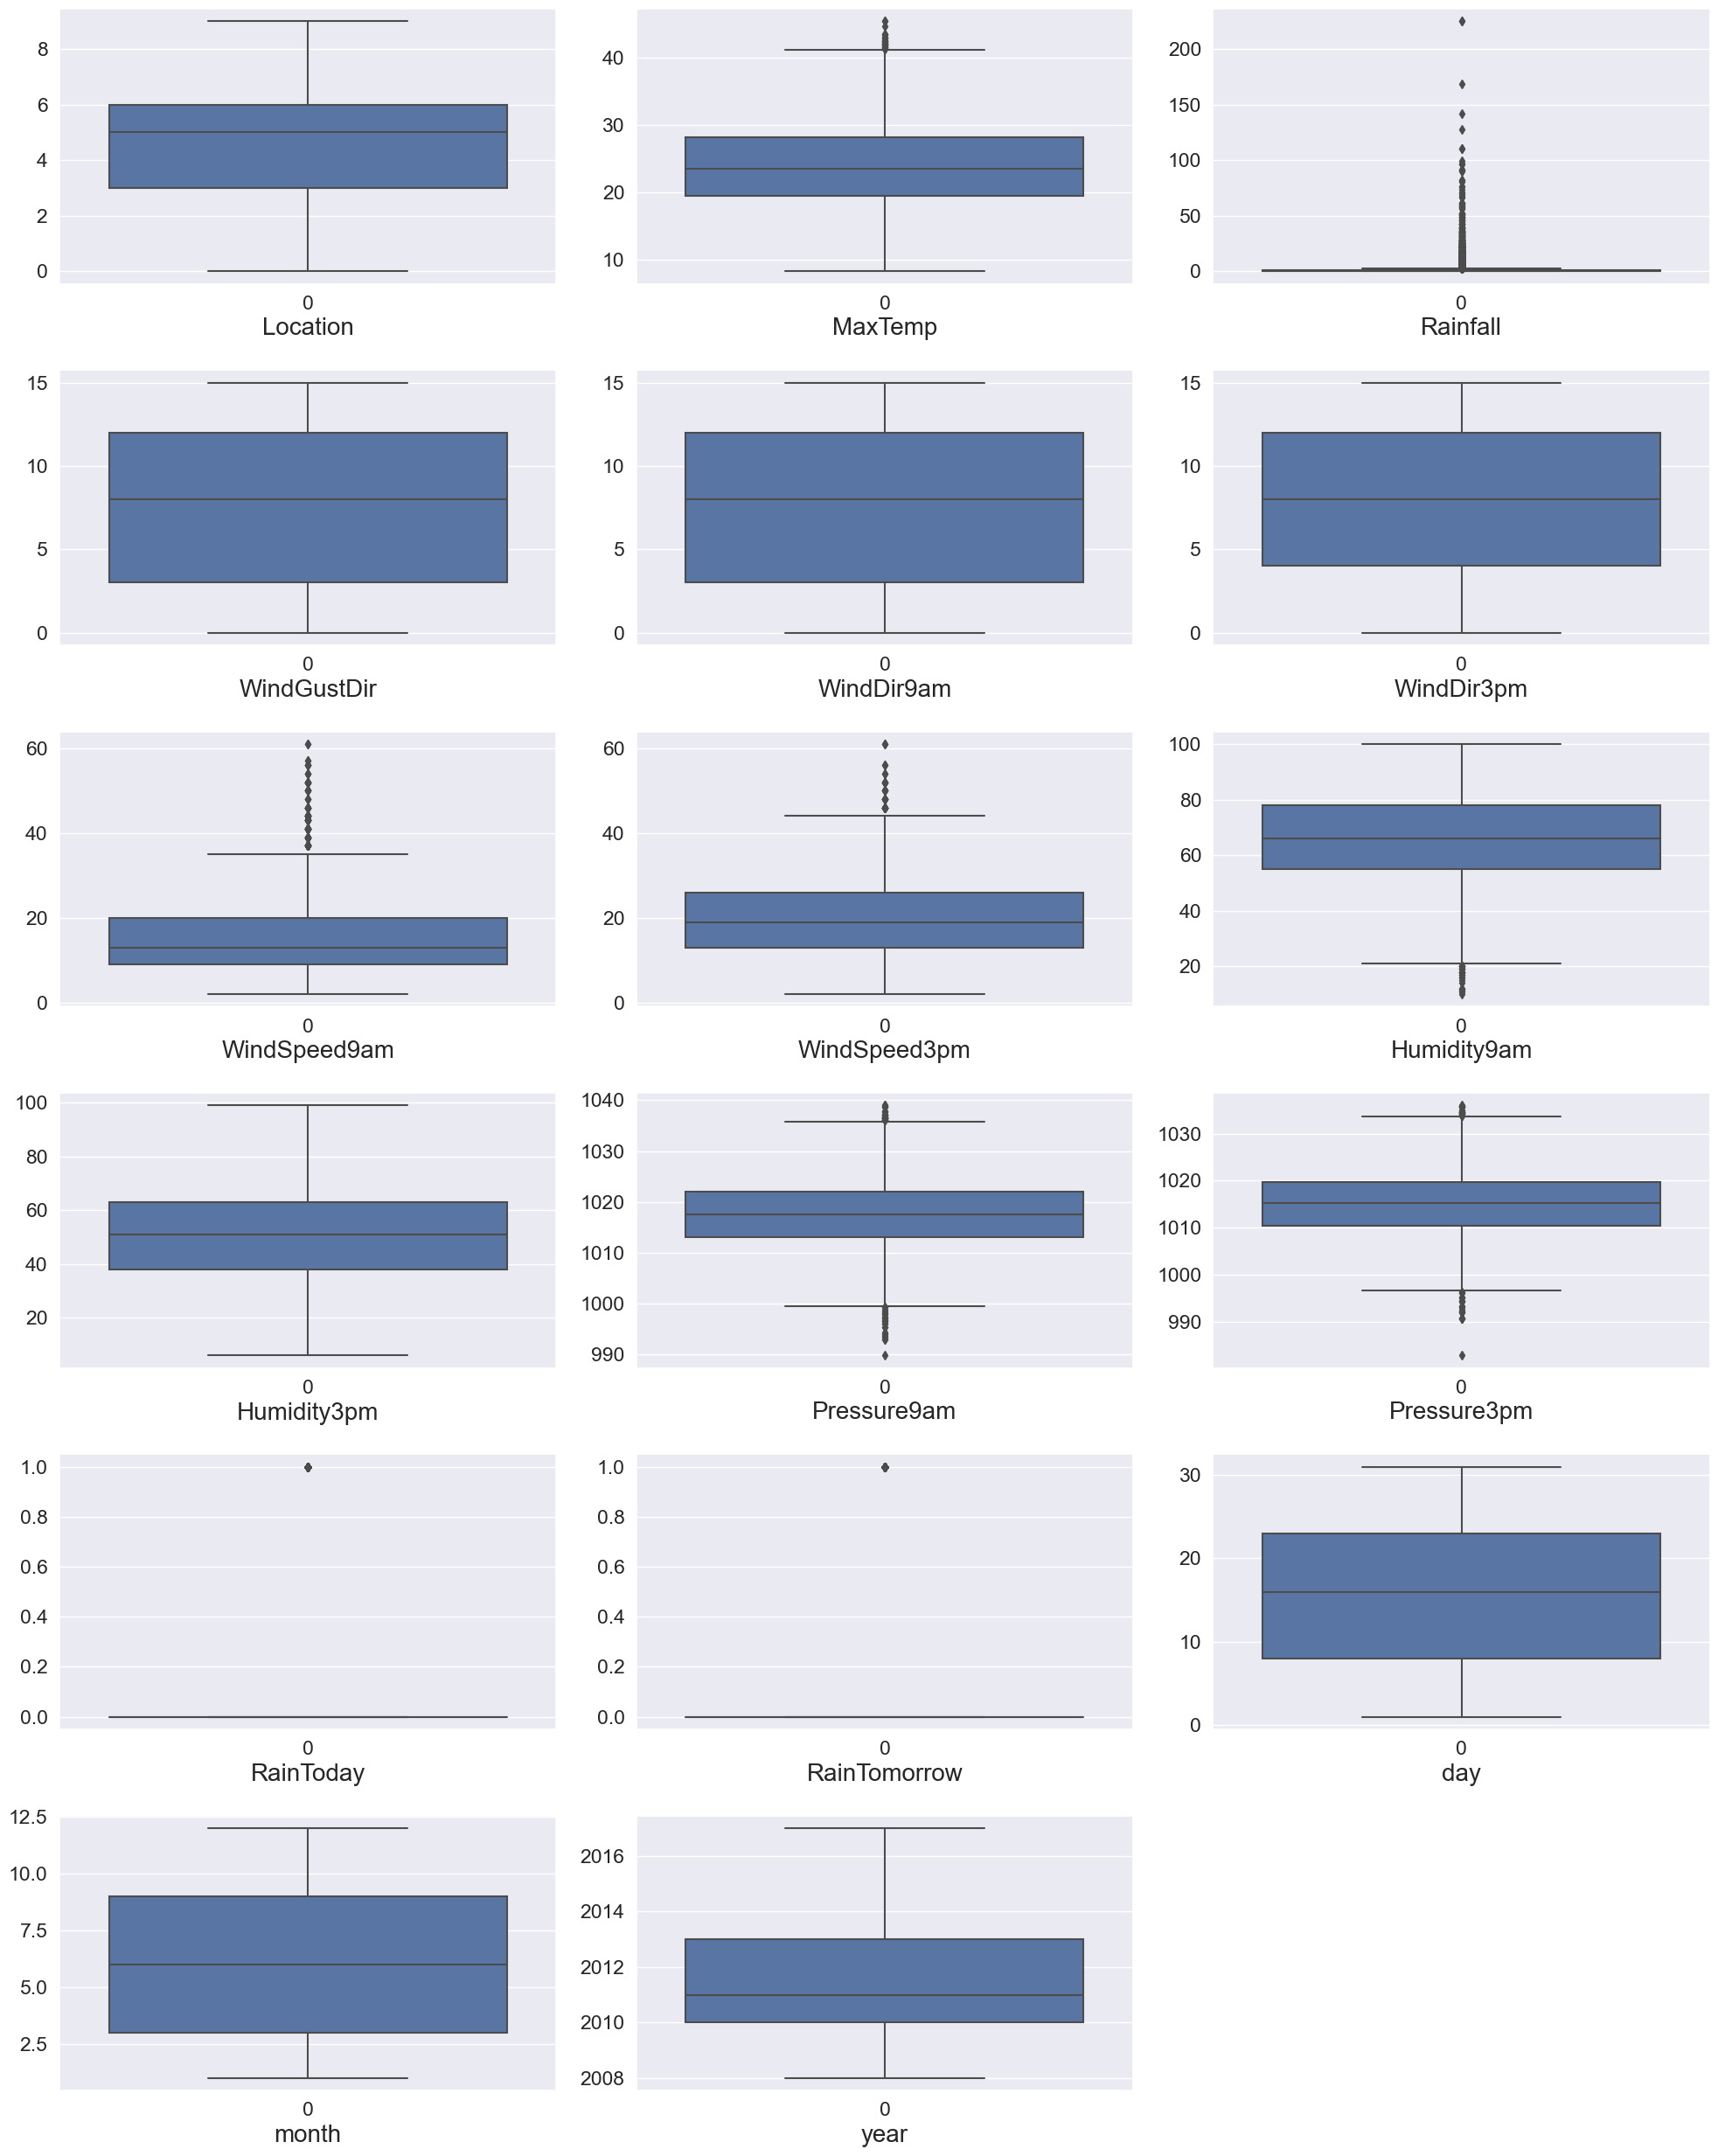

In [32]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data_copy.columns:
    if graph <= 18:
        plt.subplot(6, 3, graph)
        ax = sns.boxplot(data=data_copy[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()


##### there is lot of outlier so i will remove it

MaxTemp , WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm

In [33]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1

In [34]:
#### higher side outlier
mt_high = (q3['MaxTemp'] + (1.5* iqr['MaxTemp']))
print(mt_high)

mt_index= np.where(data_copy['MaxTemp']> mt_high) 
print (mt_index)

data_copy = data_copy.drop(data_copy.index[mt_index])
print (data_copy.shape ) 

data_copy.reset_index()

41.05
(array([  41,   56,   57,   58,   59,   61,   62,   63,  327,  328,  329,
        339, 1288, 1631, 1636, 1640, 1647, 1657, 1658, 2033, 2376, 2381,
       2385, 2392, 2402, 2403, 2842, 3187, 3542, 3887, 4944, 5263, 5894,
       5895], dtype=int64),)
(6298, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
6294,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
6295,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
6296,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [35]:
#### higher side outlier
vs_high = (q3['WindSpeed9am'] + (1.5* iqr['WindSpeed9am']))
print(vs_high)

vs_index= np.where(data_copy['WindSpeed9am']> vs_high) 
print (vs_index)

data_copy = data_copy.drop(data_copy.index[vs_index])
print (data_copy.shape ) 

data_copy.reset_index()

41.0
(array([ 757, 1431, 1471, 1472, 1486, 1493, 1692, 1772, 1880, 1929, 1930,
       1936, 2169, 2209, 2210, 2224, 2231, 2430, 2510, 2618, 2667, 2668,
       2674, 2729, 2753, 2822, 2835, 2853, 2854, 2926, 3021, 3047, 3074,
       3080, 3106, 3111, 3122, 3133, 3144, 3165, 3166, 3212, 3213, 3257,
       3279, 3301, 3302, 3303, 3305, 3323, 3329, 3330, 3341, 3344, 3350,
       3351, 3364, 3373, 3382, 3405, 3413, 3415, 3416, 3423, 3427, 3451,
       3520, 3533, 3551, 3552, 3624, 3719, 3745, 3772, 3778, 3804, 3809,
       3820, 3831, 3842, 3863, 3864, 3910, 3911, 3955, 3977, 3999, 4000,
       4001, 4003, 4021, 4027, 4028, 4039, 4042, 4048, 4049, 4062, 4071,
       4080, 4103, 4111, 4113, 4114, 4121, 4880, 5210, 5235, 5363, 5901,
       5931], dtype=int64),)
(6187, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
6183,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
6184,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
6185,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [36]:
#### higher side outlier
vs3_high = (q3['WindSpeed3pm'] + (1.5* iqr['WindSpeed3pm']))
print(vs3_high)

vs3_index= np.where(data_copy['WindSpeed3pm']> vs3_high) 
print (vs3_index)

data_copy = data_copy.drop(data_copy.index[vs3_index])
print (data_copy.shape ) 

data_copy.reset_index()

43.5
(array([  48,  297,  878,  913,  958, 1428, 1444, 1457, 1497, 1653, 1764,
       1776, 1789, 1798, 1924, 1974, 2155, 2171, 2184, 2224, 2380, 2491,
       2503, 2516, 2525, 2651, 2701, 2725, 2957, 3000, 3011, 3206, 3289,
       3296, 3338, 3382, 3614, 3657, 3668, 3863, 3946, 3953, 3995, 4964,
       4998, 5416], dtype=int64),)
(6141, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
6137,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
6138,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
6139,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [37]:
#### higher side outlier
h9_high = (q3['Humidity9am'] + (1.5* iqr['Humidity9am']))
print(h9_high)

h9_index= np.where(data_copy['Humidity9am']> h9_high) 
print (h9_index)

data_copy = data_copy.drop(data_copy.index[h9_index])
print (data_copy.shape ) 

data_copy.reset_index()

116.0
(array([], dtype=int64),)
(6141, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
6137,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
6138,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
6139,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [38]:
#### higher side outlier
p9_high = (q3['Pressure9am'] + (1.5* iqr['Pressure9am']))
print(p9_high)

p9_index= np.where(data_copy['Pressure9am']> p9_high) 
print (p9_index)

data_copy = data_copy.drop(data_copy.index[p9_index])
print (data_copy.shape ) 

data_copy.reset_index()

1036.25
(array([ 356, 1453, 1454, 2169, 2170, 2817, 2913, 3205, 3206, 3217, 3238,
       3239, 3466, 3562, 3854, 3855, 3866, 3887, 3888, 4578, 4944, 4945,
       4946], dtype=int64),)
(6118, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
6114,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
6115,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
6116,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [39]:
#### higher side outlier
p3_high = (q3['Pressure3pm'] + (1.5* iqr['Pressure3pm']))
print(p3_high)

p3_index= np.where(data_copy['Pressure3pm']> p3_high) 
print (p3_index)

data_copy = data_copy.drop(data_copy.index[p3_index])
print (data_copy.shape ) 

data_copy.reset_index()

1033.8999999999999
(array([1451, 2165, 2906, 2937, 3548, 3579, 4558], dtype=int64),)
(6111, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6106,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
6107,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
6108,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
6109,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [40]:
####(Lower side outlier)

h9_low = (q1.Humidity9am - (1.5* iqr.Humidity9am)) 
print (h9_low)

h9_index= np.where(data_copy['Humidity9am']< h9_low) 
print (h9_index)

data_copy = data_copy.drop(data_copy.index[h9_index])
print (data_copy.shape ) 

data_copy.reset_index()

20.0
(array([4602, 4614, 4615, 4617, 4627, 4637, 4653, 4677, 4678, 4679, 4989,
       4990, 5088, 5094, 5124, 5286, 5296, 5313, 5615, 5984], dtype=int64),)
(6091, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6086,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
6087,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
6088,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
6089,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [41]:
####(Lower side outlier)

pa_low = (q1.Pressure9am - (1.5* iqr.Pressure9am)) 
print (pa_low)

pa_index= np.where(data_copy['Pressure9am']< pa_low) 
print (pa_index)

data_copy = data_copy.drop(data_copy.index[pa_index])
print (data_copy.shape ) 

data_copy.reset_index()

999.0500000000001
(array([  12,  216,  507,  570, 1752, 1753, 2465, 2466, 2707, 3007, 3067,
       3347, 3647, 3707, 4712, 5422], dtype=int64),)
(6075, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6070,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
6071,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
6072,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
6073,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [42]:
####(Lower side outlier)

pa3_low = (q1.Pressure3pm - (1.5* iqr.Pressure3pm)) 
print (pa3_low)

pa3_index= np.where(data_copy['Pressure3pm']< pa3_low) 
print (pa3_index)

data_copy = data_copy.drop(data_copy.index[pa3_index])
print (data_copy.shape ) 

data_copy.reset_index()

996.3
(array([1617, 2328, 4509], dtype=int64),)
(6072, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
6068,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
6069,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
6070,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


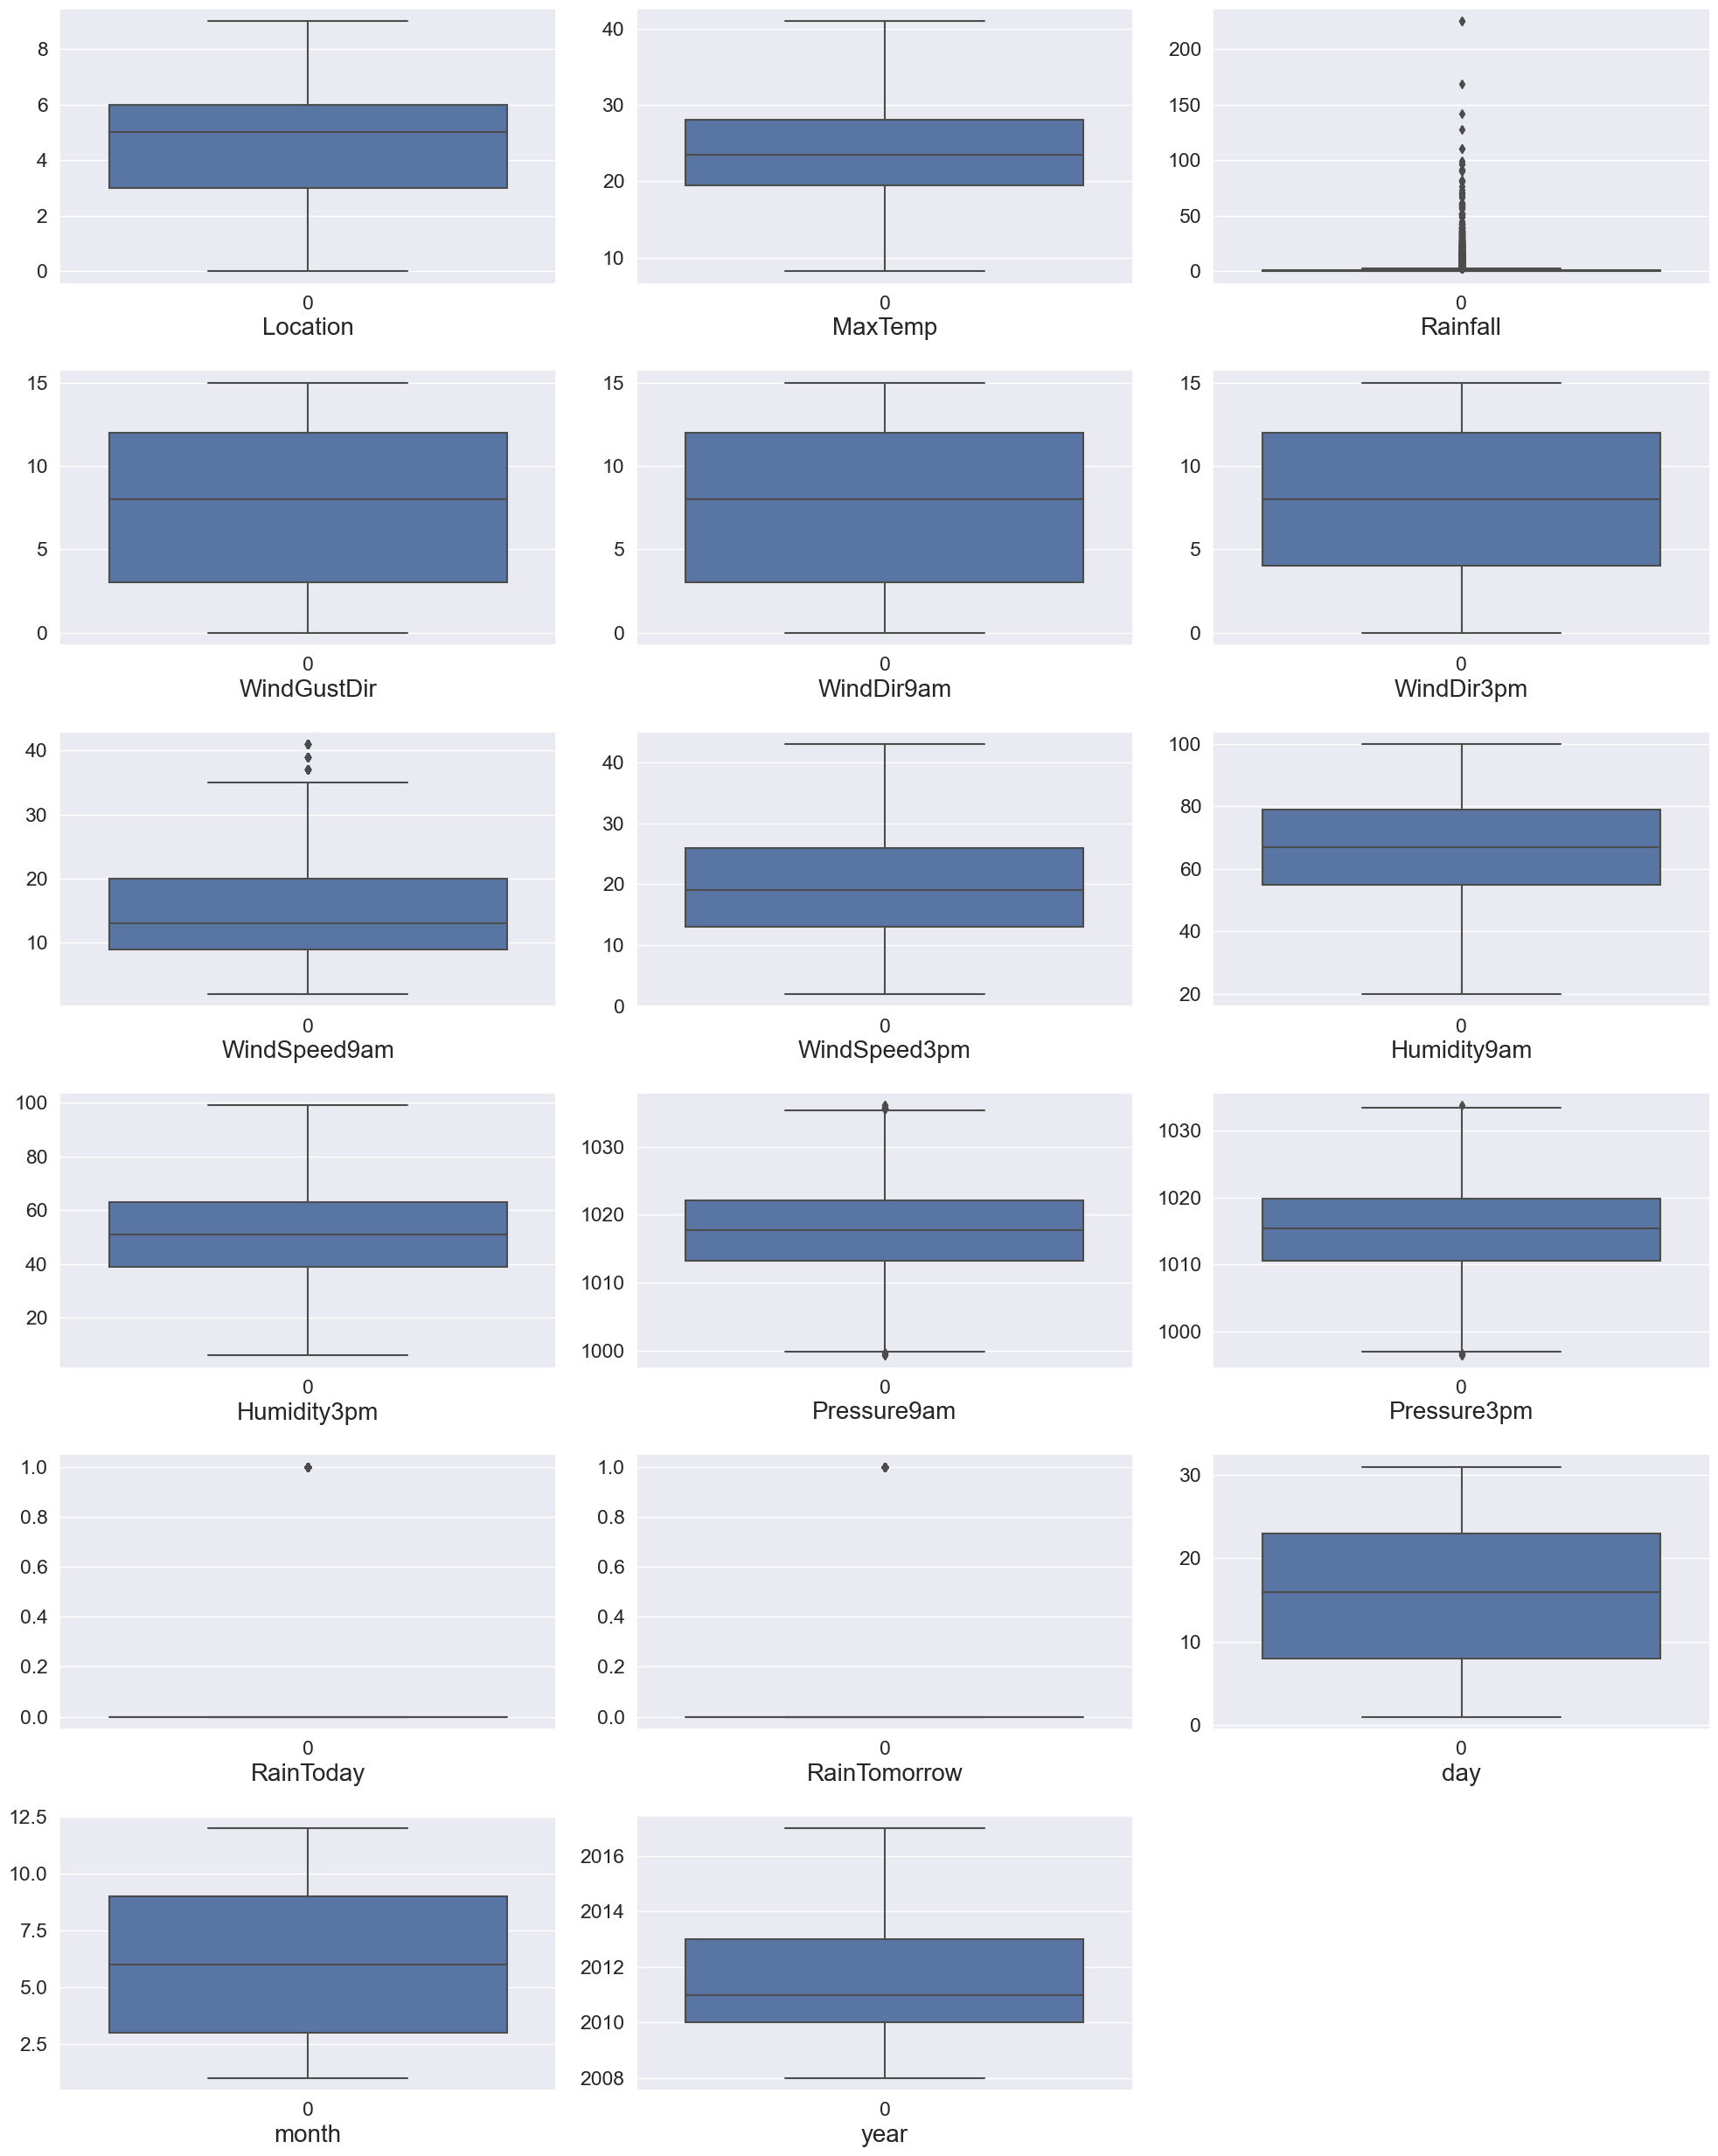

In [43]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data_copy.columns:
    if graph <= 18:
        plt.subplot(6, 3, graph)
        ax = sns.boxplot(data=data_copy[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()


In [44]:
data_copy.skew()

Location       -0.154864
MaxTemp         0.263263
Rainfall        9.412279
WindGustDir    -0.159629
WindDir9am     -0.070548
WindDir3pm     -0.105706
WindSpeed9am    0.697929
WindSpeed3pm    0.297920
Humidity9am    -0.169344
Humidity3pm     0.104348
Pressure9am    -0.000085
Pressure3pm     0.029532
RainToday       1.165164
RainTomorrow    1.218159
day            -0.008172
month           0.095106
year            0.815893
dtype: float64

there is too much skewness in target variable so i will remove skewness or outlier from this. and also remove skew from WindSpeed9am

In [45]:
data1 = data_copy.copy(deep = True)   

In [46]:
data1['WindSpeed9am'] = np.sqrt(data1['WindSpeed9am'])
data1['Rainfall'] = np.sqrt(data1['Rainfall'])

In [47]:
data1.skew()

Location       -0.154864
MaxTemp         0.263263
Rainfall        2.713654
WindGustDir    -0.159629
WindDir9am     -0.070548
WindDir3pm     -0.105706
WindSpeed9am    0.091280
WindSpeed3pm    0.297920
Humidity9am    -0.169344
Humidity3pm     0.104348
Pressure9am    -0.000085
Pressure3pm     0.029532
RainToday       1.165164
RainTomorrow    1.218159
day            -0.008172
month           0.095106
year            0.815893
dtype: float64

In [48]:
data_copy['WindSpeed9am'] = np.sqrt(data_copy['WindSpeed9am'])
data_copy['Rainfall'] = np.sqrt(data_copy['Rainfall'])

In [49]:
data_copy.skew()

Location       -0.154864
MaxTemp         0.263263
Rainfall        2.713654
WindGustDir    -0.159629
WindDir9am     -0.070548
WindDir3pm     -0.105706
WindSpeed9am    0.091280
WindSpeed3pm    0.297920
Humidity9am    -0.169344
Humidity3pm     0.104348
Pressure9am    -0.000085
Pressure3pm     0.029532
RainToday       1.165164
RainTomorrow    1.218159
day            -0.008172
month           0.095106
year            0.815893
dtype: float64

In [50]:
#now skewness removed

#### Let's divide feature and label.

In [51]:
x = data_copy.drop('Rainfall',axis = 1)
y = data_copy['Rainfall']

#### Scaled the features

In [52]:
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)

#### Model bulding

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.20, random_state = 30)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n============Train Result================")
        mae = mean_absolute_error(y_train, y_pred)
        mse = mean_squared_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)

    elif not train:
        y_pred = clf.predict(x_test)
        print("\n============Test Result================")
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)


### DecisionTreeRegressor

In [56]:
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [57]:
metric_score(dtr,x_train,x_test,y_train,y_test,train=True)        
metric_score(dtr,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  1.7143653870061095e-19
Mean Squared Error :  9.516639626373e-36
R-squared (R2) Score :  1.0

============Test Result================
Mean Absolute Error :  0.2950730571712909
Mean Squared Error :  0.680701328982652
R-squared (R2) Score :  0.6513457946038974


### AdaBoostRegressor

In [58]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [59]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)        
metric_score(ada,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  0.5873314366702596
Mean Squared Error :  0.887986320679006
R-squared (R2) Score :  0.6069039073548674

============Test Result================
Mean Absolute Error :  0.6047413237971103
Mean Squared Error :  0.990294652224257
R-squared (R2) Score :  0.49277255621744576


### KNeighborsRegressor

In [60]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [61]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)        
metric_score(knn,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  0.31009197506650765
Mean Squared Error :  0.46448997910896217
R-squared (R2) Score :  0.7943783686657088

============Test Result================
Mean Absolute Error :  0.35869357187610984
Mean Squared Error :  0.5923701152281223
R-squared (R2) Score :  0.696588910537411


### LinearRegression

In [62]:
lin= LinearRegression() 
lin.fit(x_train, y_train)

LinearRegression()

In [63]:
metric_score(lin,x_train,x_test,y_train,y_test,train=True)        
metric_score(lin,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  0.43970653751162786
Mean Squared Error :  0.7346220013926411
R-squared (R2) Score :  0.6747956228675025

============Test Result================
Mean Absolute Error :  0.43129738871445417
Mean Squared Error :  0.5656008784650821
R-squared (R2) Score :  0.7103000736794411


### cross-validation

In [64]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [65]:
lasso_regressor = LassoCV(alphas=None,max_iter=8)
lasso_regressor.fit(x_train, y_train)

LassoCV(max_iter=8)

In [66]:
alpha = lasso_regressor.alpha_
alpha

0.0012175295302500019

In [67]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0012175295302500019)

In [68]:
lasso_reg.score(x_test, y_test)

0.7100392630412499

## Hyperparameter tuning:

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_g = {'n_neighbors': [3, 5, 7],  
           'weights': ['uniform', 'distance'],  
           'metric': ['euclidean', 'manhattan'],  
           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
           'p': [1, 2]}


In [71]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_g, scoring='neg_mean_squared_error', cv=5)


In [72]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [73]:
best_params = grid_search.best_params_
best_params

{'algorithm': 'ball_tree',
 'metric': 'euclidean',
 'n_neighbors': 7,
 'p': 1,
 'weights': 'distance'}

In [74]:
grid_search.best_score_

-0.49089303217937985

In [75]:
knn_mod = KNeighborsRegressor(algorithm= 'ball_tree',metric= 'euclidean',n_neighbors= 7,p= 1,weights= 'distance')
knn_mod.fit(x_train,y_train)


KNeighborsRegressor(algorithm='ball_tree', metric='euclidean', n_neighbors=7,
                    p=1, weights='distance')

In [76]:
# Call the function and pass dataset to check train and test score
metric_score(knn_mod,x_train,x_test,y_train,y_test, train=True)       
metric_score(knn_mod,x_train,x_test,y_train,y_test, train=False)       


============Train Result================
Mean Absolute Error :  0.0
Mean Squared Error :  0.0
R-squared (R2) Score :  1.0

============Test Result================
Mean Absolute Error :  0.24419655663954637
Mean Squared Error :  0.41910341010107277
R-squared (R2) Score :  0.7853358584653058


#### now result is better so i will choose knn_mod

In [77]:
import pickle

In [78]:
pickle.dump(knn_mod,open('Rainfall____','wb'))

## For RainTomorrow

In [79]:
data_copy2 = data2.copy(deep = True)   

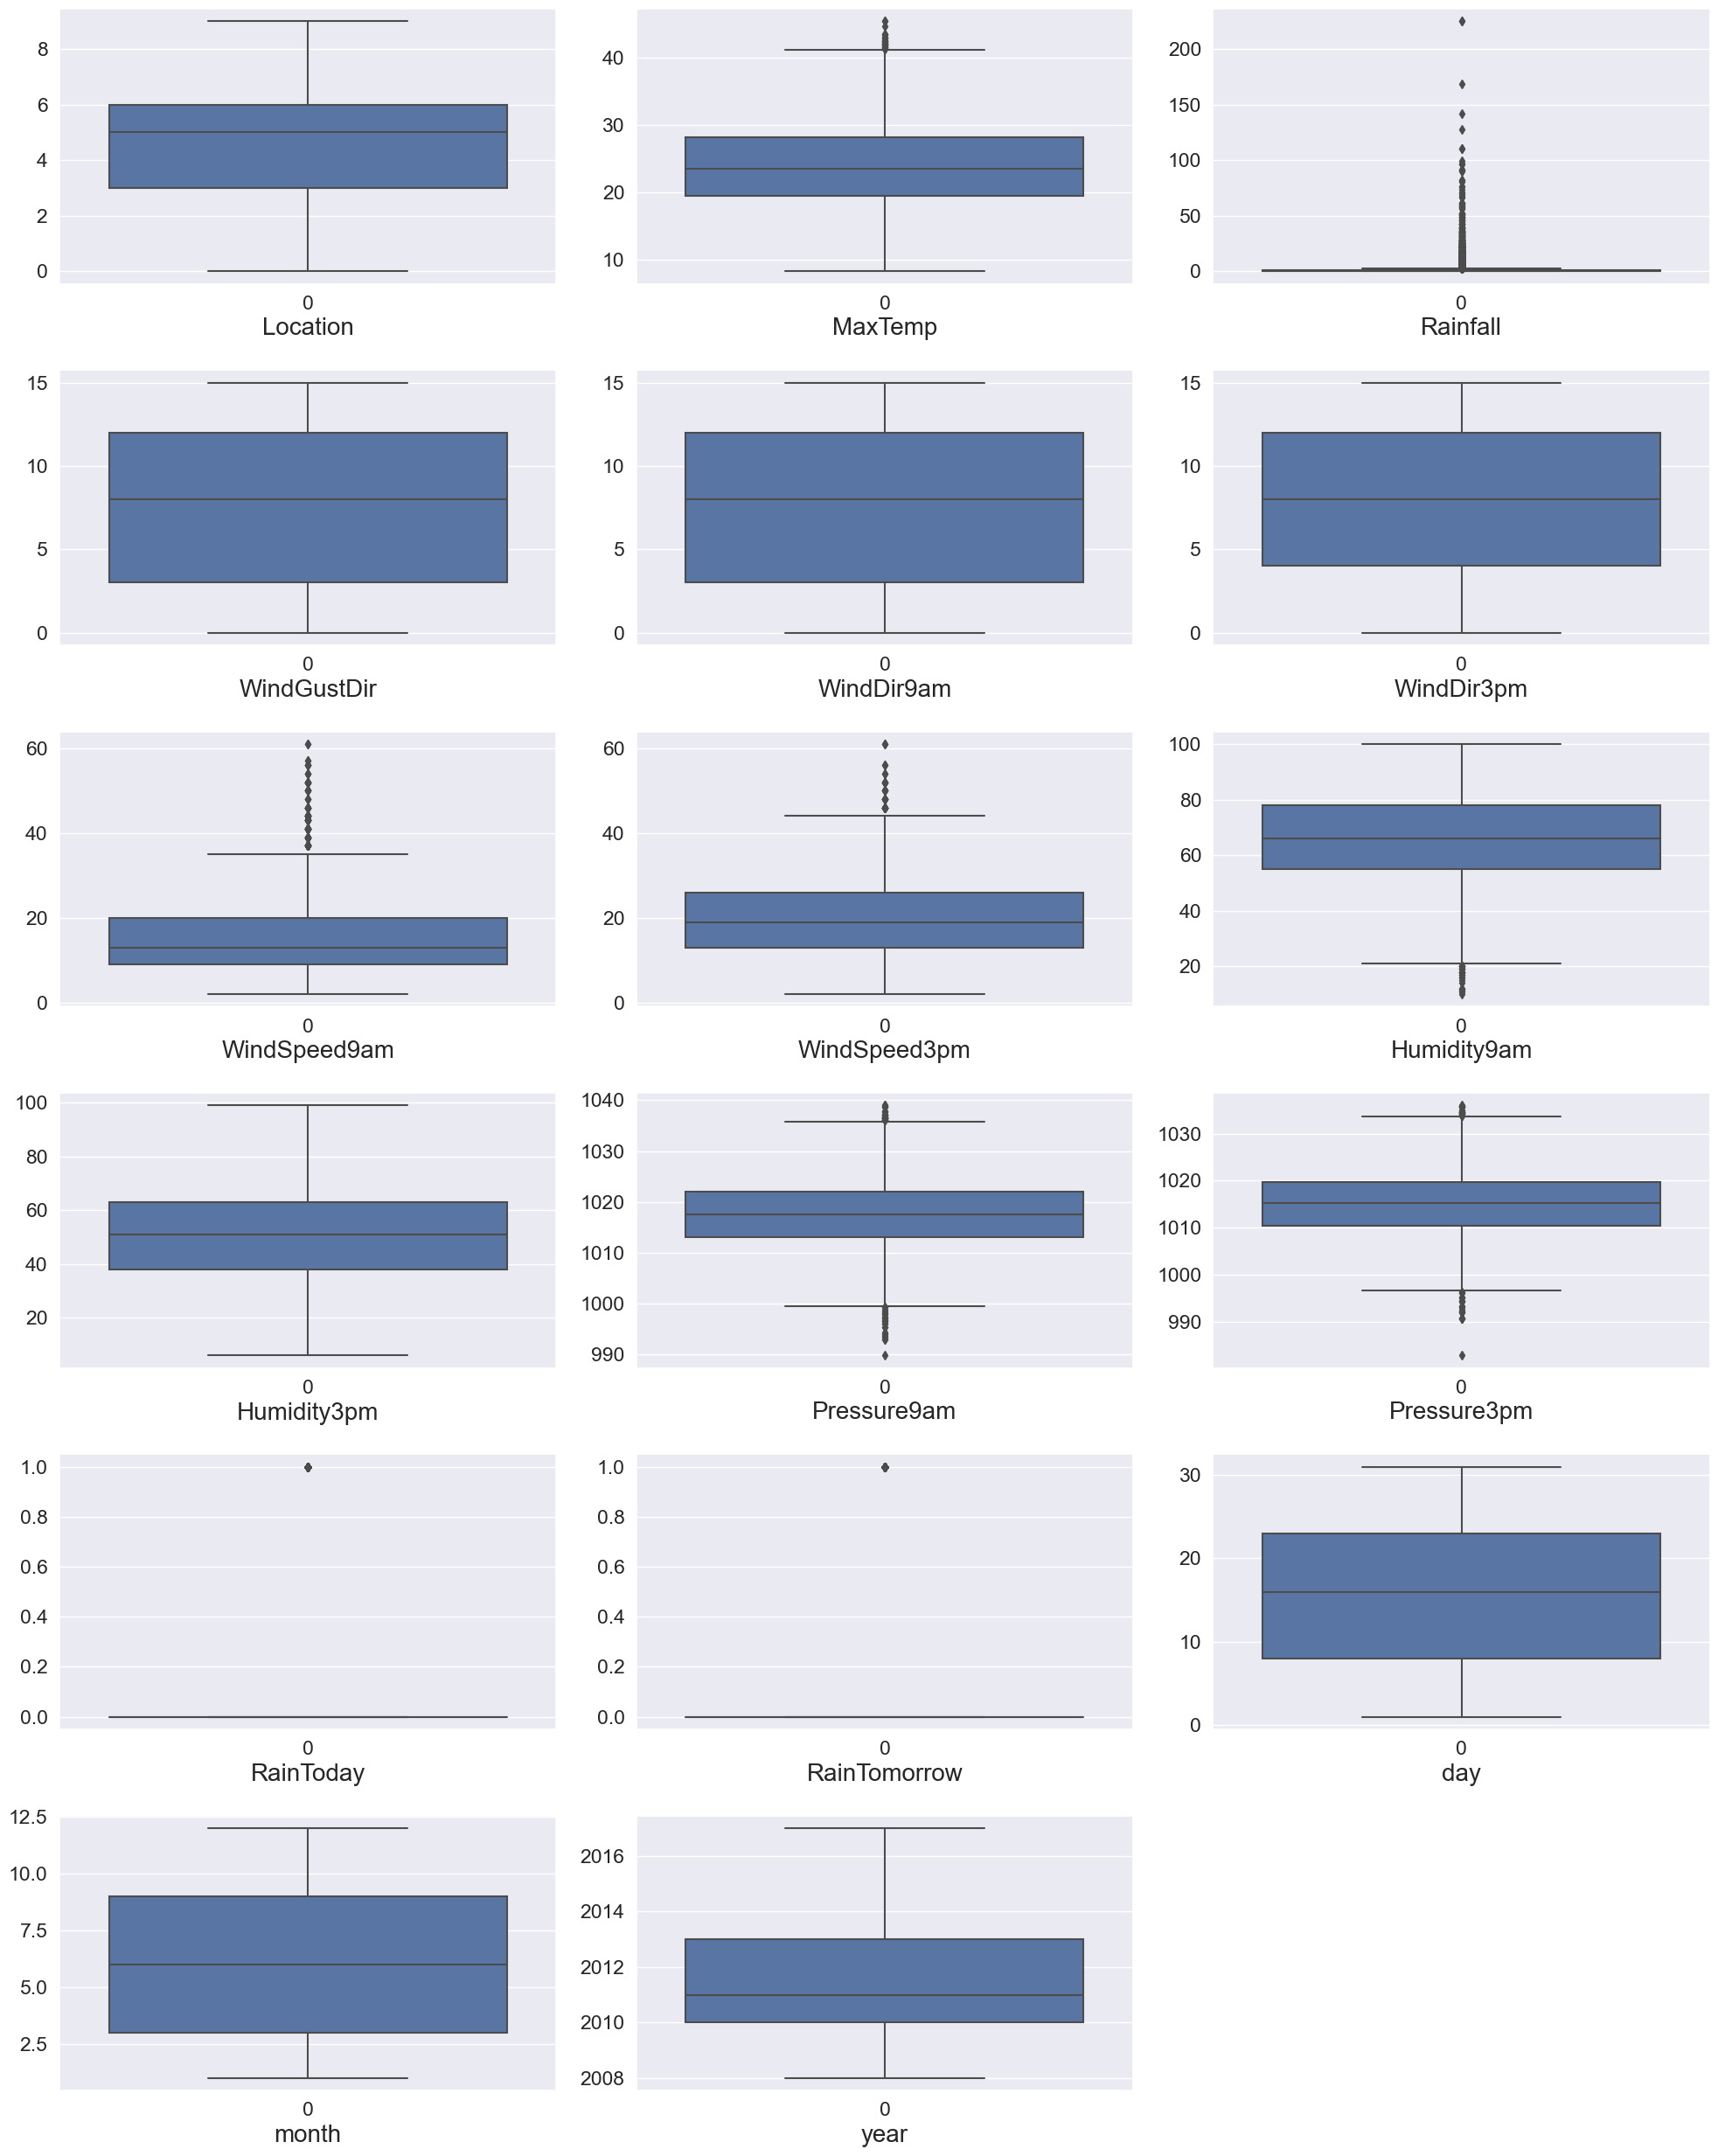

In [80]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data_copy2.columns:
    if graph <= 18:
        plt.subplot(6, 3, graph)
        ax = sns.boxplot(data=data_copy2[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()

##### lot of outlier present hear 

MaxTemp , Rainfall, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm

In [81]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1

In [82]:
#### higher side outlier
mt_high = (q3['MaxTemp'] + (1.5* iqr['MaxTemp']))
print(mt_high)

mt_index= np.where(data_copy2['MaxTemp']> mt_high) 
print (mt_index)

data_copy2 = data_copy2.drop(data_copy2.index[mt_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

41.05
(array([  41,   56,   57,   58,   59,   61,   62,   63,  327,  328,  329,
        339, 1288, 1631, 1636, 1640, 1647, 1657, 1658, 2033, 2376, 2381,
       2385, 2392, 2402, 2403, 2842, 3187, 3542, 3887, 4944, 5263, 5894,
       5895], dtype=int64),)
(6298, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
6294,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
6295,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
6296,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [83]:
#### higher side outlier
ran_high = (q3['Rainfall'] + (1.5* iqr['Rainfall']))
print(ran_high)

ran_index= np.where(data_copy2['Rainfall']> ran_high) 
print (ran_index)

data_copy2 = data_copy2.drop(data_copy2.index[ran_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

2.5
(array([  12,   13,   15, ..., 6254, 6257, 6259], dtype=int64),)
(5093, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
5089,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
5090,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
5091,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [84]:
#### higher side outlier
sp9_high = (q3['WindSpeed9am'] + (1.5* iqr['WindSpeed9am']))
print(sp9_high)

sp9_index= np.where(data_copy2['WindSpeed9am']> sp9_high) 
print (sp9_index)

data_copy2 = data_copy2.drop(data_copy2.index[sp9_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

41.0
(array([1127, 1162, 1163, 1177, 1182, 1388, 1516, 1517, 1708, 1743, 1744,
       1758, 1763, 1969, 2097, 2098, 2145, 2165, 2231, 2246, 2247, 2312,
       2384, 2403, 2427, 2432, 2449, 2454, 2462, 2468, 2476, 2494, 2495,
       2528, 2529, 2564, 2582, 2600, 2601, 2602, 2604, 2618, 2624, 2625,
       2634, 2637, 2642, 2643, 2653, 2659, 2663, 2682, 2689, 2690, 2697,
       2701, 2721, 2787, 2802, 2803, 2868, 2940, 2959, 2983, 2988, 3005,
       3010, 3018, 3024, 3032, 3050, 3051, 3084, 3085, 3120, 3138, 3156,
       3157, 3158, 3160, 3174, 3180, 3181, 3190, 3193, 3198, 3199, 3209,
       3215, 3219, 3238, 3245, 3246, 3253, 3884, 4157, 4179, 4739, 4769],
      dtype=int64),)
(4994, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
4990,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
4991,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
4992,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [85]:
#### higher side outlier
sp3_high = (q3['WindSpeed3pm'] + (1.5* iqr['WindSpeed3pm']))
print(sp3_high)

sp3_index= np.where(data_copy2['WindSpeed3pm']> sp3_high) 
print (sp3_index)

data_copy2 = data_copy2.drop(data_copy2.index[sp3_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

43.5
(array([  44,  247,  700,  730,  768, 1125, 1141, 1150, 1185, 1306, 1391,
       1402, 1411, 1512, 1551, 1698, 1714, 1723, 1758, 1879, 1964, 1975,
       1984, 2085, 2124, 2144, 2338, 2370, 2590, 2625, 2661, 2855, 2887,
       3107, 3142], dtype=int64),)
(4959, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
4955,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
4956,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
4957,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [86]:
#### higher side outlier
p9_high = (q3['Pressure9am'] + (1.5* iqr['Pressure9am']))
print(p9_high)

p9_index= np.where(data_copy2['Pressure9am']> p9_high) 
print (p9_index)

data_copy2 = data_copy2.drop(data_copy2.index[p9_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

1036.25
(array([ 294, 1146, 1147, 1709, 1710, 2217, 2299, 2520, 2521, 2530, 2545,
       2546, 2729, 2811, 3032, 3033, 3042, 3057, 3058, 3611, 3928, 3929,
       3930], dtype=int64),)
(4936, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
4932,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
4933,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
4934,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [87]:
#### higher side outlier
p3_high = (q3['Pressure3pm'] + (1.5* iqr['Pressure3pm']))
print(p3_high)

p3_index= np.where(data_copy2['Pressure3pm']> p3_high) 
print (p3_index)

data_copy2 = data_copy2.drop(data_copy2.index[p3_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

1033.8999999999999
(array([1144, 1705, 2292, 2317, 2797, 2822, 3591], dtype=int64),)
(4929, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
4925,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
4926,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
4927,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [88]:
####(Lower side outlier)

h9_low = (q1.Humidity9am - (1.5* iqr.Humidity9am)) 
print (h9_low)

h9_index= np.where(data_copy2['Humidity9am']< h9_low) 
print (h9_index)

data_copy2 = data_copy2.drop(data_copy2.index[h9_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

20.0
(array([3632, 3644, 3645, 3647, 3656, 3666, 3679, 3702, 3703, 3704, 3958,
       3959, 4051, 4057, 4085, 4205, 4215, 4230, 4477, 4809], dtype=int64),)
(4909, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
4905,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
4906,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
4907,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [89]:
####(Lower side outlier)

pa_low = (q1.Pressure9am - (1.5* iqr.Pressure9am)) 
print (pa_low)

pa_index= np.where(data_copy2['Pressure9am']< pa_low) 
print (pa_index)

data_copy2 = data_copy2.drop(data_copy2.index[pa_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

999.0500000000001
(array([1369, 1929, 3733], dtype=int64),)
(4906, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
4902,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
4903,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
4904,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


In [90]:
####(Lower side outlier)

pa3_low = (q1.Pressure3pm - (1.5* iqr.Pressure3pm)) 
print (pa3_low)

pa3_index= np.where(data_copy2['Pressure3pm']< pa3_low) 
print (pa3_index)

data_copy2 = data_copy2.drop(data_copy2.index[pa3_index])
print (data_copy2.shape ) 

data_copy2.reset_index()

996.3
(array([1281, 1840, 3563], dtype=int64),)
(4903, 17)


,index,Location,MaxTemp,Rainfall,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,day,month,year
0,0,1.0,22.9,0.6,13.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,0.0,0.0,1,12,2008
1,1,1.0,25.1,0.0,14.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,2,12,2008
2,2,1.0,25.7,0.0,15.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,0.0,3,12,2008
3,3,1.0,28.0,0.0,4.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,4,12,2008
4,4,1.0,32.3,1.0,13.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,0.0,0.0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,8419,7.0,21.8,0.0,0.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,0.0,0.0,20,6,2017
4899,8420,7.0,23.4,0.0,0.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,21,6,2017
4900,8421,7.0,25.3,0.0,6.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,22,6,2017
4901,8422,7.0,26.9,0.0,3.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,23,6,2017


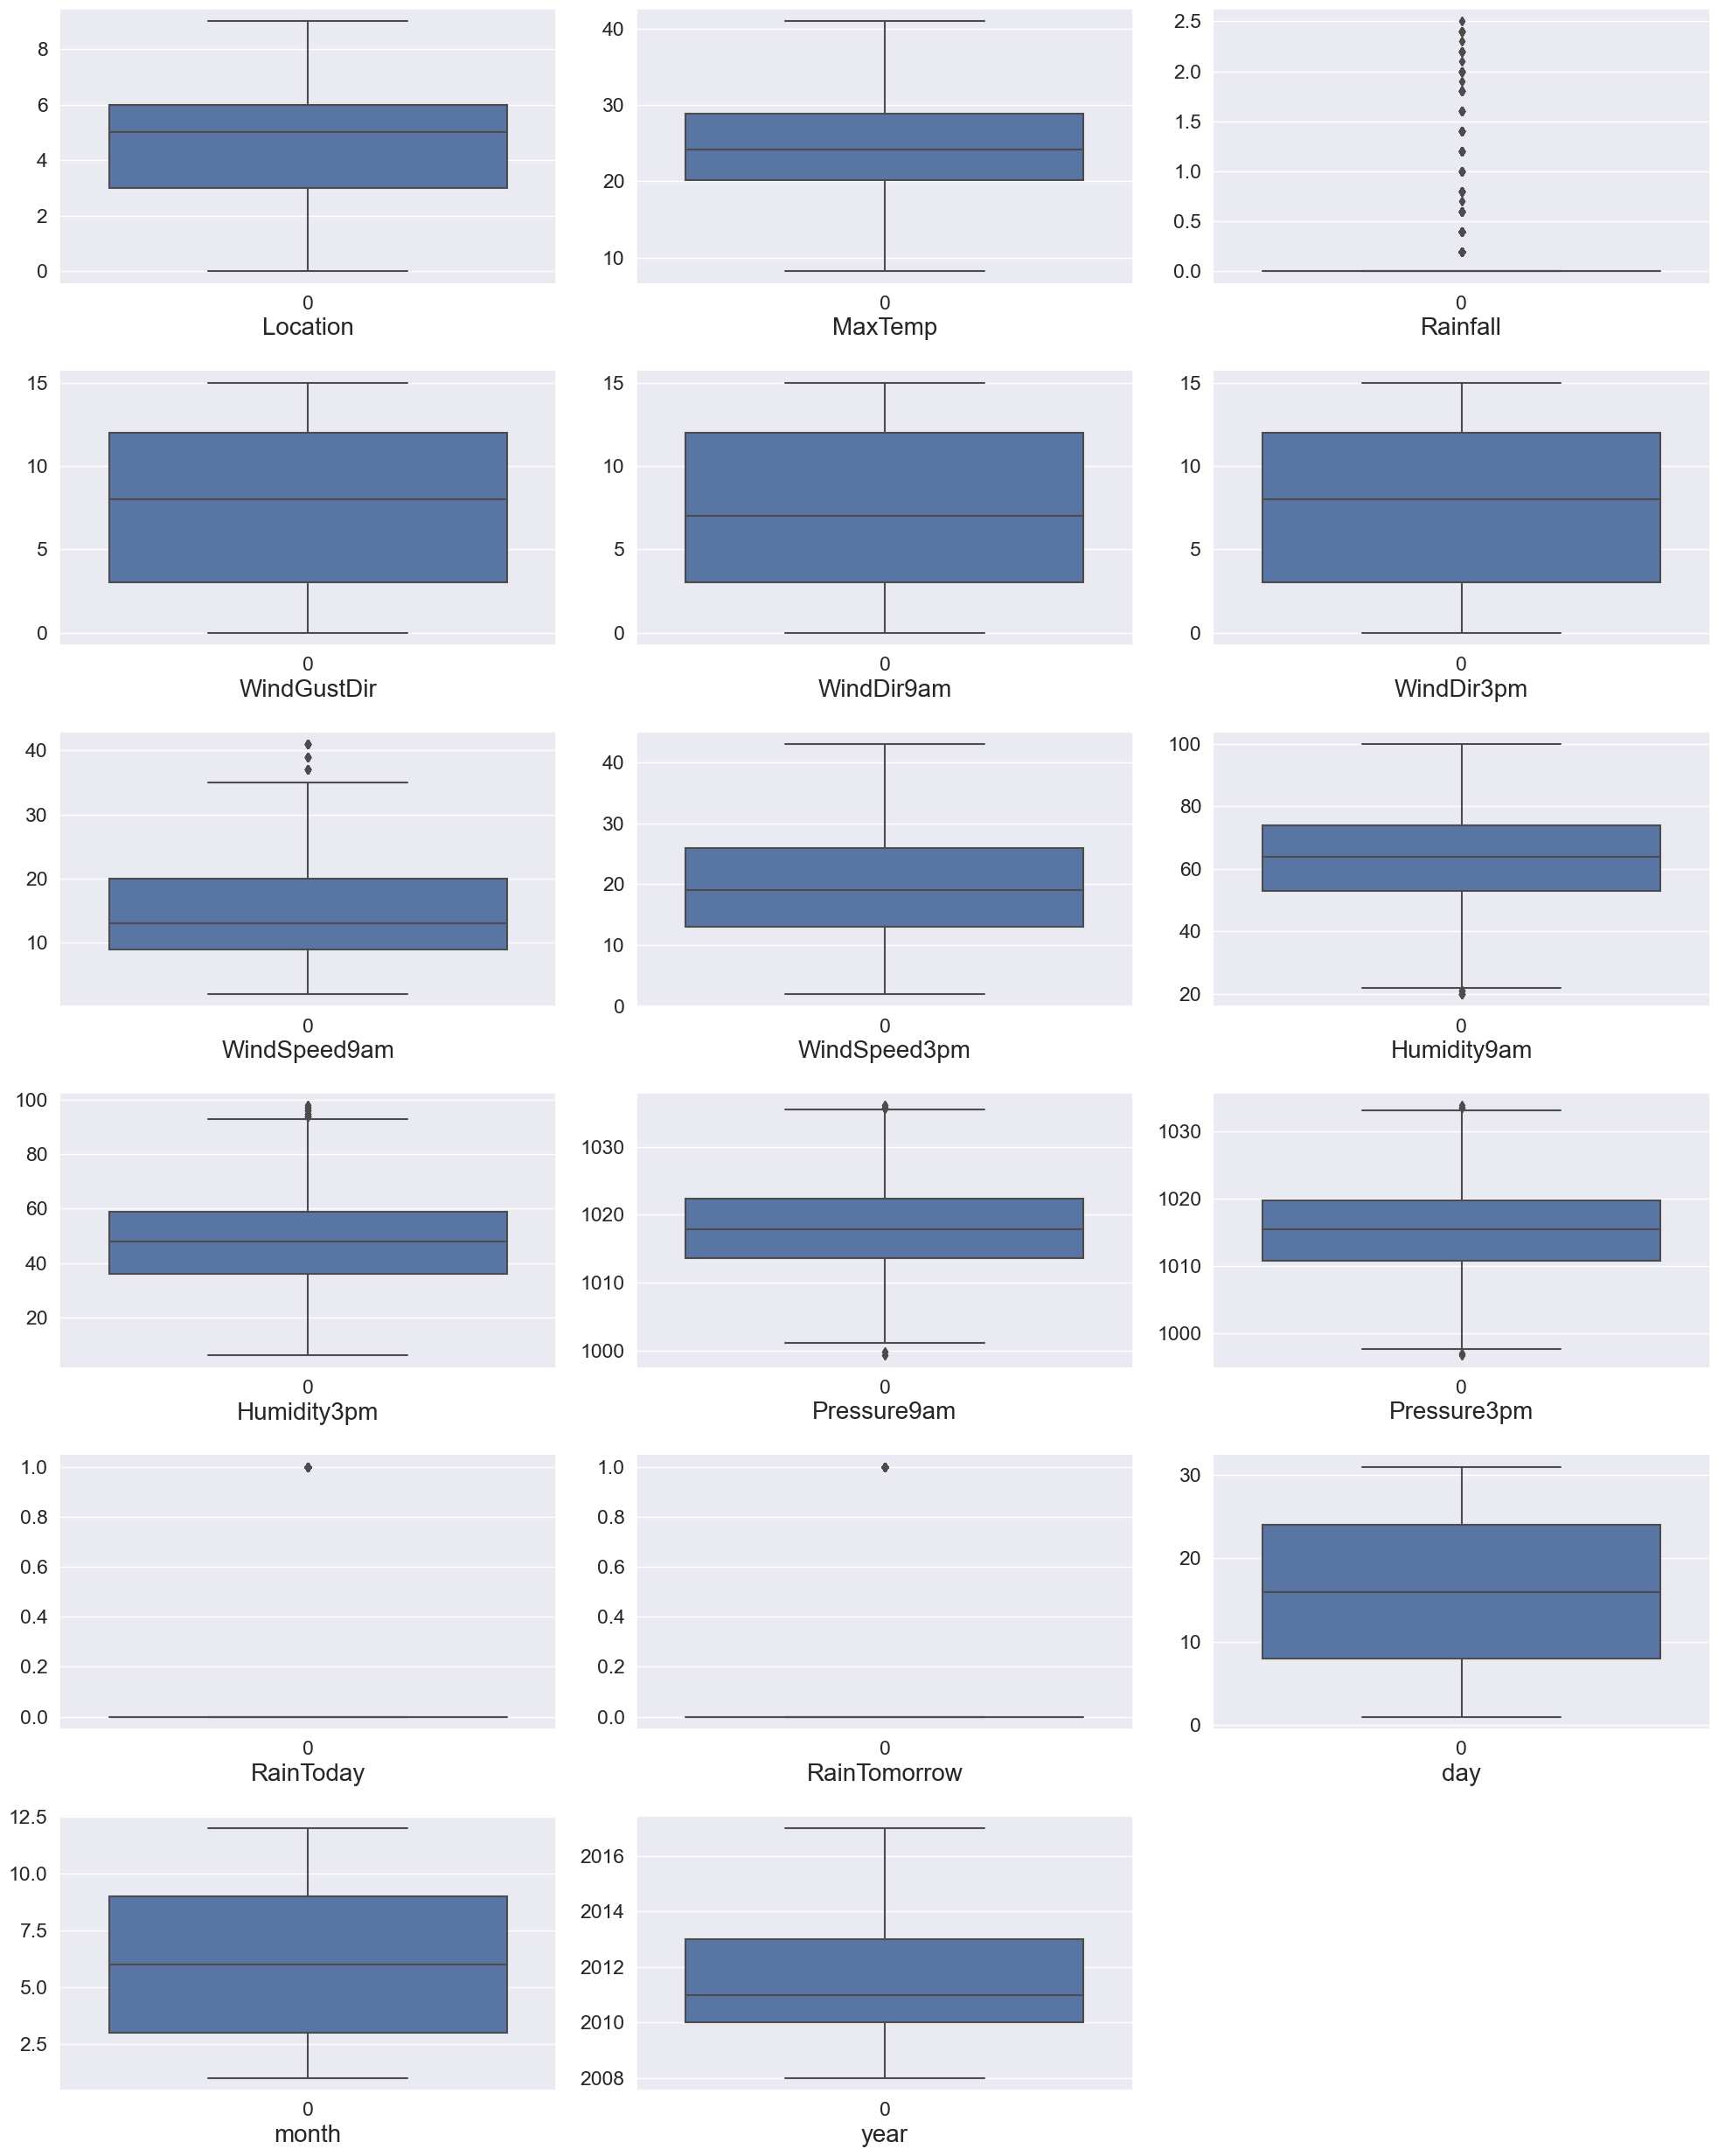

In [91]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data_copy2.columns:
    if graph <= 18:
        plt.subplot(6, 3, graph)
        ax = sns.boxplot(data=data_copy2[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()

now outliers are removed but there is still an outlier in rainfall so we will remove skewness.

In [92]:
data_copy2.skew()

Location       -0.162669
MaxTemp         0.201274
Rainfall        3.154167
WindGustDir    -0.073749
WindDir9am      0.021088
WindDir3pm     -0.030058
WindSpeed9am    0.741789
WindSpeed3pm    0.297982
Humidity9am    -0.130273
Humidity3pm     0.114503
Pressure9am     0.044899
Pressure3pm     0.070210
RainToday       3.397715
RainTomorrow    1.760482
day            -0.033209
month           0.091057
year            0.794626
dtype: float64

In [93]:
data_copy2['WindSpeed9am'] = np.sqrt(data_copy2['WindSpeed9am'])
data_copy2['Rainfall'] = np.sqrt(data_copy2['Rainfall'])

In [94]:
data_copy2.skew()

Location       -0.162669
MaxTemp         0.201274
Rainfall        2.283025
WindGustDir    -0.073749
WindDir9am      0.021088
WindDir3pm     -0.030058
WindSpeed9am    0.135818
WindSpeed3pm    0.297982
Humidity9am    -0.130273
Humidity3pm     0.114503
Pressure9am     0.044899
Pressure3pm     0.070210
RainToday       3.397715
RainTomorrow    1.760482
day            -0.033209
month           0.091057
year            0.794626
dtype: float64

#### Let's divide feature and label.

In [95]:
x2 = data_copy2.drop(columns = ['RainTomorrow']) 
y2 = data_copy2['RainTomorrow']                  

In [96]:
##### oversample

In [97]:
y2.value_counts()

0.0    4071
1.0     832
Name: RainTomorrow, dtype: int64

In [98]:
data_copy2.shape

(4903, 17)

In [99]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x2, y2)

#### Scaled the features

In [100]:
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x_resampled)

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_resampled,test_size = 0.22, random_state= 1)

#### Model bulding

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

def metric_score2(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred_train = clf.predict(x_train)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")
        print('\nTrain Confusion Matrix:')
        print(confusion_matrix(y_train, y_pred_train))
        
    elif not train:
        y_pred_test = clf.predict(x_test)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred_test) * 100:.2f}%")
        print('\nTest Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred_test))
        print('\nTest Classification Report:')
        print(classification_report(y_test, y_pred_test, digits=2))

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### LogisticRegression

In [104]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [105]:
metric_score2(log,x_train,x_test,y_train,y_test, train=True)        # training score 
metric_score2(log,x_train,x_test,y_train,y_test, train=False)       # testing score


========================Train Result======================

Accuracy Score: 75.06%

Train Confusion Matrix:
[[2432  743]
 [ 841 2334]]

========================Test Result==========================
Accuracy Score: 74.05%

Test Confusion Matrix:
[[676 220]
 [245 651]]

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       896
         1.0       0.75      0.73      0.74       896

    accuracy                           0.74      1792
   macro avg       0.74      0.74      0.74      1792
weighted avg       0.74      0.74      0.74      1792



### DecisionTreeClassifier

In [106]:
clf2 = DecisionTreeClassifier()
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
metric_score2(clf2,x_train,x_test,y_train,y_test, train=True) 
metric_score2(clf2,x_train,x_test,y_train,y_test, train=False)       


========================Train Result======================

Accuracy Score: 100.00%

Train Confusion Matrix:
[[3175    0]
 [   0 3175]]

========================Test Result==========================
Accuracy Score: 91.13%

Test Confusion Matrix:
[[808  88]
 [ 71 825]]

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       896
         1.0       0.90      0.92      0.91       896

    accuracy                           0.91      1792
   macro avg       0.91      0.91      0.91      1792
weighted avg       0.91      0.91      0.91      1792



### RandomForestClassifier

In [108]:
rfc2 = RandomForestClassifier()
rfc2.fit(x_train,y_train)

RandomForestClassifier()

In [109]:
metric_score2(rfc2,x_train,x_test,y_train,y_test, train=True) 
metric_score2(rfc2,x_train,x_test,y_train,y_test, train=False)      


========================Train Result======================

Accuracy Score: 100.00%

Train Confusion Matrix:
[[3175    0]
 [   0 3175]]

========================Test Result==========================
Accuracy Score: 95.93%

Test Confusion Matrix:
[[861  35]
 [ 38 858]]

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       896
         1.0       0.96      0.96      0.96       896

    accuracy                           0.96      1792
   macro avg       0.96      0.96      0.96      1792
weighted avg       0.96      0.96      0.96      1792



### KNeighborsClassifier

In [110]:
knn2 = KNeighborsClassifier()
knn2.fit(x_train,y_train)

KNeighborsClassifier()

In [111]:
metric_score2(knn2,x_train,x_test,y_train,y_test, train=True) 
metric_score2(knn2,x_train,x_test,y_train,y_test, train=False)   


========================Train Result======================

Accuracy Score: 92.58%

Train Confusion Matrix:
[[2726  449]
 [  22 3153]]

========================Test Result==========================
Accuracy Score: 88.78%

Test Confusion Matrix:
[[715 181]
 [ 20 876]]

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       896
         1.0       0.83      0.98      0.90       896

    accuracy                           0.89      1792
   macro avg       0.90      0.89      0.89      1792
weighted avg       0.90      0.89      0.89      1792



### ### Cross Validation

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
######LogisticRegression
cross_val_scores = cross_val_score(log, x_scaled, y_resampled, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.6723417541097099


In [114]:
###### DecisionTreeClassifier
cross_val_scores = cross_val_score(clf2, x_scaled, y_resampled, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.7591665497742847


In [115]:
######RandomForestClassifier
cross_val_scores = cross_val_score(rfc2, x_scaled, y_resampled, cv=10, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.9163931806876592


In [116]:
###### KNeighborsClassifier
cross_val_scores = cross_val_score(knn2, x_scaled, y_resampled, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.7182672627424009


#### RandomForestClassifier result is very good so I will choose RandomForestClassifier modle

In [117]:
pickle.dump(rfc2,open('RainTomorrow_____','wb'))